In [121]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [126]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [127]:
train = read_data('data/train.tsv')
validation = read_data('data/validation.tsv')
test = read_data('data/test.tsv')

In [128]:
train.head(10)
validation.head(10)
test.head(10)

,title,tags
0,"what does this instruction do?:- mov %gs:0x14,...",[c]
1,Raspberry Pi: How to show output from python o...,[python]
2,Platform independent tool to copy text to clip...,[python]
3,Using javascript to get server information,"[php, javascript]"
4,How to secure a php based webservice,"[php, web-services]"
5,Is there any difference between a CGRect and a...,"[objective-c, cocoa-touch]"
6,"In R, select a group of rows and filter",[r]
7,Rails: macro style functions,[ruby-on-rails]
8,Changing checkbox's parent element css if chec...,"[javascript, jquery, forms]"
9,how to convert string to System.Net.IPAddress,"[c#, .net]"


In [129]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test, y_test = test['title'].values, test['tags'].values

In [130]:
import re

In [131]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = list((stopwords.words('english')))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = re.sub('[A-Z]+', lambda x: x.group(0).lower(), text)
    text = re.sub(r'[/(){}\[\]\\|@,;]', r' ', text)
    text = re.sub(r'[^0-9a-z #+_]', r'', text)
    
    word_list = text.split()
    text = ' '.join([i for i in word_list if i not in STOPWORDS])
    
    return text

In [132]:
test = "SQL Server - any equivalent of Excel's CHOOSE function?"
text_prepare(test)


'sql server equivalent excels choose function'

In [133]:
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'
print(test_text_prepare())

Basic tests are passed.


In [134]:
X_train[:20]

array(['Sqlite REFERENCES keyword',
       'Why does Python have a maximum recursion depth?',
       'Double PostBack inside UpdatePanel',
       'OpenCV: A straighforward method of colorizing a grayscale image',
       'Angular Cli Webpack, How to add or bundle external js files?',
       'Javascript Close Popup windows after certain time',
       'How to add BreadCrumbs in my vaadin application?',
       'Is it possible to have a scope with optional arguments?',
       'Bootstrap Navbar-Brand change after scroll',
       'Confusion using Lua and Cocos2d-x when creating CCScale9Sprite',
       'hide line beginning and end text separators',
       'How to conver HTML + Javascript to PDF using PHP',
       'How to properly use the write() function for sockets?',
       'Possible to init NSArray with empty values?',
       'How to force exit iOS application using Monotouch?',
       "How to use the DropDownList's SelectedIndexChanged event",
       'What datatype in oracle would map to a

In [135]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [136]:
X_train[:20]

['sqlite references keyword',
 'python maximum recursion depth',
 'double postback inside updatepanel',
 'opencv straighforward method colorizing grayscale image',
 'angular cli webpack add bundle external js files',
 'javascript close popup windows certain time',
 'add breadcrumbs vaadin application',
 'possible scope optional arguments',
 'bootstrap navbarbrand change scroll',
 'confusion using lua cocos2dx creating ccscale9sprite',
 'hide line beginning end text separators',
 'conver html + javascript pdf using php',
 'properly use write function sockets',
 'possible init nsarray empty values',
 'force exit ios application using monotouch',
 'use dropdownlists selectedindexchanged event',
 'datatype oracle would map java int',
 'append childnode specific position',
 'option select use sql c++',
 'create slice using tuple']

In [137]:
from collections import Counter, defaultdict

In [138]:
# Dictionary of all words from train corpus with their counts.
words_counts = defaultdict(int)

for phrase in X_train:
    for word in phrase.split():
        words_counts[word] += 1

In [139]:
# Dictionary of all tags from train corpus with their counts.
tags_counts = defaultdict(int)

for all_tags in y_train:
    for tag in all_tags:
        tags_counts[tag] += 1

In [140]:
print('There are '+str(len(tags_counts))+' unique labels (tags) in dataset.\n')
tags_counts

There are 100 unique labels (tags) in dataset.



defaultdict(int,
            {'.net': 3105,
             'ajax': 1417,
             'algorithm': 332,
             'android': 2241,
             'angularjs': 1080,
             'apache': 345,
             'arrays': 1798,
             'asp.net': 3183,
             'asp.net-mvc': 997,
             'c': 2502,
             'c#': 15277,
             'c++': 5173,
             'class': 403,
             'cocoa-touch': 406,
             'codeigniter': 626,
             'css': 1418,
             'csv': 342,
             'database': 599,
             'date': 458,
             'datetime': 459,
             'django': 1470,
             'dom': 311,
             'eclipse': 802,
             'entity-framework': 517,
             'excel': 348,
             'facebook': 395,
             'file': 463,
             'forms': 703,
             'function': 365,
             'generics': 328,
             'google-maps': 321,
             'hibernate': 648,
             'html': 3773,
             'html5': 693,
 

In [141]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]
print("Most Common tags", most_common_tags)


Most Common tags [('javascript', 15332), ('c#', 15277), ('java', 14940)]


In [142]:
print("Most Common words", most_common_words)

Most Common words [('using', 6641), ('php', 4486), ('java', 4388)]


In [143]:
DICT_SIZE = 5000
INDEX_TO_WORDS = sorted(words_counts.keys(), key = lambda x: words_counts[x], reverse=True)[:DICT_SIZE]
WORDS_TO_INDEX = {word:i for i, word in enumerate(INDEX_TO_WORDS)}
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    bow_result = np.zeros(dict_size)
    for w in text.split():
        if w in words_to_index:
            bow_result[words_to_index[w]] += 1
    return bow_result

In [144]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [145]:
print(test_my_bag_of_words())

Basic tests are passed.


In [146]:
from scipy import sparse as sp_sparse

In [147]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])

print('X_train shape ', X_train_mybag.shape)
print('X_val shape   ', X_val_mybag.shape)
print('X_test shape  ', X_test_mybag.shape)

X_train shape  (80071, 5000)
X_val shape    (30000, 5000)
X_test shape   (19929, 5000)


In [80]:
row = X_train_mybag[10].toarray()[0]
non_zero_elements_count = (row>0).sum()

print(non_zero_elements_count)

5


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1,2), token_pattern='(\S+)')
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_val, X_test, tfidf_vectorizer.vocabulary_

In [83]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [84]:
print('X_train shape: ', X_train_tfidf.shape)
print('X_val shape:   ', X_val_tfidf.shape)
print('X_test shape:  ', X_test_tfidf.shape)

X_train shape:  (80071, 14890)
X_val shape:    (30000, 14890)
X_test shape:   (19929, 14890)


In [85]:
tfidf_vocab['c++']

1599

In [86]:
tfidf_reversed_vocab[1599]

'c++'

In [87]:
from sklearn.preprocessing import MultiLabelBinarizer

In [88]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)
y_test = mlb.fit_transform(y_test)

In [90]:
y_test.shape
y_train.shape
y_val.shape

(30000, 100)

In [91]:
print('Nb. labels:      ', y_train.shape[1])
print('Training labels: ', y_train.shape)
print('validation labels:  ', y_val.shape)
print('testing labels:  ', y_test.shape)

Nb. labels:       100
Training labels:  (80071, 100)
validation labels:   (30000, 100)
testing labels:   (19929, 100)


In [93]:
# For multiclass classification
from sklearn.multiclass import OneVsRestClassifier

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB


In [94]:
def train_classifier(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    """
      X_train, y_train — training data
      
      return: trained classifier
      
    """
    
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        

    return model

In [95]:
print(X_train_mybag.shape)
print(X_train_tfidf.shape)
print(y_train.shape)

(80071, 5000)
(80071, 14890)
(80071, 100)


In [96]:
%%time
# Linear NLP model using bag of words approach
classifier_mybag = train_classifier(X_train_mybag, y_train, C=1.0, model='lr')

CPU times: user 48.5 s, sys: 628 ms, total: 49.2 s
Wall time: 49.6 s


In [97]:
%%time
# Linear NLP model using TF-IDF approach Logistic REgresssion
classifier_tfidf = train_classifier(X_train_tfidf, y_train, C=1.0, model='lr')

CPU times: user 40.1 s, sys: 242 ms, total: 40.3 s
Wall time: 40.5 s


In [100]:
#Predictions for the validation set
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

In [101]:
#Predictions for the test set
y_test_predicted_labels_mybag = classifier_mybag.predict(X_test_mybag)
y_test_predicted_scores_mybag = classifier_mybag.decision_function(X_test_mybag)

y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfidf)

In [102]:
# prediction on tf-idf few examples on validation set
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	ruby-on-rails


Title:	sessions sinatra used pass variable
True labels:	ruby,session
Predicted labels:	ruby,session


Title:	getting error type json exist postgresql rake db migrate
True labels:	json,ruby,ruby-on-rails
Predicted labels:	json,ruby-on-rails




In [120]:
# prediction on tf-idf few examples on test set
y_test_pred_inversed = mlb.inverse_transform(y_test_predicted_labels_tfidf)
y_test_inversed = mlb.inverse_transform(y_test)
for i in range(1, 10000, 100):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_test_pred_inversed[i])
    ))

Title:	raspberry pi show output python tft display
True labels:	python
Predicted labels:	python


Title:	efficient algorithm reading data excel spreadsheet java
True labels:	algorithm,excel,java
Predicted labels:	excel,java


Title:	show hide iframes button
True labels:	css,html,javascript,jquery
Predicted labels:	javascript


Title:	check url exists returns 404 java
True labels:	java
Predicted labels:	java


Title:	select2 add data without replacing content
True labels:	html,javascript,jquery
Predicted labels:	


Title:	send objects nib files front back
True labels:	iphone,objective-c,xcode
Predicted labels:	


Title:	cannot install addin outlook 2007
True labels:	c#
Predicted labels:	c#


Title:	serialportopen ioexception parameter incorrect
True labels:	.net,c#
Predicted labels:	java


Title:	better way disable checkbox
True labels:	vb.net,winforms
Predicted labels:	


Title:	group count array without using loop
True labels:	ruby
Predicted labels:	


Title:	iis 75 performance issue 

In [104]:
# Evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score:          ', round(accuracy_score(y_val, predicted),2))
    print('F1 score:                ', round(f1_score(y_val, predicted, average='weighted'),2))
    print('Average precision score: ', round(average_precision_score(y_val, predicted),2))

In [106]:
# On the validation set
print('Validtion set')
print('BAG-OF-WORDS')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('\nTFIDF')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Validtion set
BAG-OF-WORDS
Accuracy score:           0.37
F1 score:                 0.66
Average precision score:  0.36

TFIDF
Accuracy score:           0.38
F1 score:                 0.66
Average precision score:  0.37


In [107]:
# On the test set
print('Test set')
print('BAG-OF-WORDS')
print_evaluation_scores(y_test, y_test_predicted_labels_mybag)
print('\nTFIDF')
print_evaluation_scores(y_test, y_test_predicted_labels_tfidf)

Test set
BAG-OF-WORDS
Accuracy score:           0.37
F1 score:                 0.66
Average precision score:  0.37

TFIDF
Accuracy score:           0.38
F1 score:                 0.66
Average precision score:  0.38


In [108]:
import matplotlib.pyplot as plt
from metrics import roc_auc
%matplotlib inline

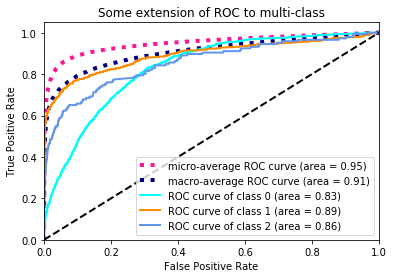

In [109]:
# ROC curve for validation set bag of words
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

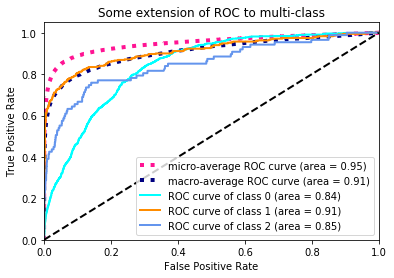

In [110]:
# ROC curve for test set bag of words
n_classes = len(tags_counts)
roc_auc(y_test, y_test_predicted_scores_mybag, n_classes)

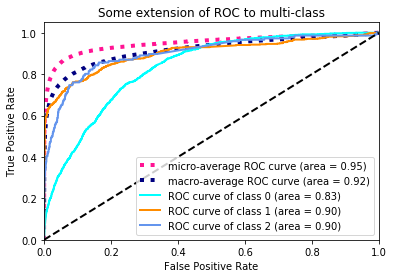

In [111]:
# ROC curve for validation set tfidf
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

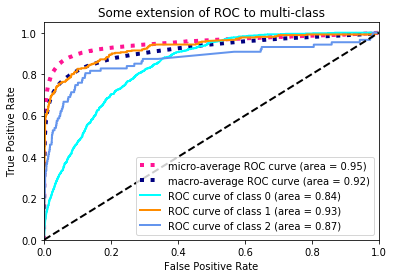

In [112]:
# ROC curve for test set tfidf
n_classes = len(tags_counts)
roc_auc(y_test, y_test_predicted_scores_tfidf, n_classes)

In [113]:
# Changing the hyperparameters for the validation set
hypers = np.arange(0.1, 2, 0.1)
res = []

for h in hypers:
    temp_model = train_classifier(X_train_mybag, y_train, C=h, model='lr')
    temp_pred = f1_score(y_val, temp_model.predict(X_val_mybag), average='weighted')
    res.append(temp_pred)

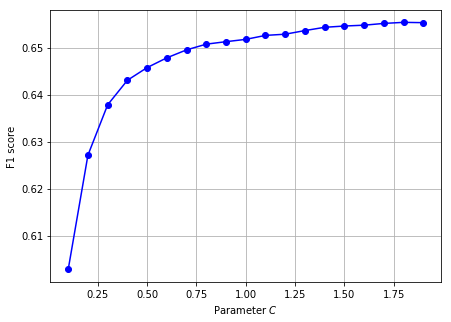

In [114]:
plt.figure(figsize=(7,5))
plt.plot(hypers, res, color='blue', marker='o')
plt.grid(True)
plt.xlabel('Parameter $C$')
plt.ylabel('F1 score')
plt.show()

In [118]:
# Final model
C = 1.0
classifier = train_classifier(X_train_mybag, y_train, C=C, model='lr')

# Results
test_predictions =  classifier.predict(X_test_mybag)
test_pred_inversed = mlb.inverse_transform(test_predictions)

for i in range(len(y_test_pred_inversed)):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(test_pred_inversed[i])
    ))

Title:	instruction mov gs0x14 eax
True labels:	c
Predicted labels:	


Title:	raspberry pi show output python tft display
True labels:	python
Predicted labels:	python


Title:	platform independent tool copy text clipboard
True labels:	python
Predicted labels:	


Title:	using javascript get server information
True labels:	javascript,php
Predicted labels:	javascript


Title:	secure php based webservice
True labels:	php,web-services
Predicted labels:	php,web-services


Title:	difference cgrect nsrect
True labels:	cocoa-touch,objective-c
Predicted labels:	


Title:	r select group rows filter
True labels:	r
Predicted labels:	r


Title:	rails macro style functions
True labels:	ruby-on-rails
Predicted labels:	ruby-on-rails


Title:	changing checkboxs parent element css checked unchecked
True labels:	forms,javascript,jquery
Predicted labels:	css,html,javascript


Title:	convert string systemnetipaddress
True labels:	.net,c#
Predicted labels:	


Title:	encrypt cookie browser
True labels:	javascr

Title:	send data thread main activity java android
True labels:	android,java,multithreading
Predicted labels:	android,java


Title:	c# enum long values
True labels:	c#
Predicted labels:	c#


Title:	set style datagrid header wpf
True labels:	c#,wpf
Predicted labels:	c#,wpf,xaml


Title:	swift sort dictionary value
True labels:	swift
Predicted labels:	sorting,swift


Title:	php serialization alternative
True labels:	php
Predicted labels:	php


Title:	update multiple records one activerecord transaction rails
True labels:	ruby,ruby-on-rails
Predicted labels:	ruby,ruby-on-rails


Title:	html form multiple fields
True labels:	forms,html,php
Predicted labels:	html,javascript


Title:	using linq equals
True labels:	c#,linq
Predicted labels:	c#,linq


Title:	safari windows typeerror undefined function evaluating thiselfind iconsearch get 0 click
True labels:	javascript,jquery
Predicted labels:	javascript


Title:	using sigint
True labels:	c++,windows
Predicted labels:	


Title:	count many seco


Title:	robot framework nested statement
True labels:	python
Predicted labels:	


Title:	php notice array string conversion error
True labels:	arrays,php
Predicted labels:	php


Title:	use htmlagilitypack appendnode
True labels:	c#
Predicted labels:	c#


Title:	get proper bounds c# windows forms panel draw border
True labels:	c#,winforms
Predicted labels:	c#,winforms


Title:	pass data redirect view laravel
True labels:	laravel,php
Predicted labels:	laravel,php


Title:	beautifulsoup4 select elements attributes equal x
True labels:	html,python,python-2.7
Predicted labels:	


Title:	create email button javascript
True labels:	html,javascript
Predicted labels:	javascript


Title:	android bluetoothsocket write fails 422
True labels:	android,java
Predicted labels:	android,java


Title:	lockfileex read write upgrade downgrade
True labels:	c++
Predicted labels:	


Title:	convert data values color information matplotlib
True labels:	numpy,python
Predicted labels:	python


Title:	using keypres

Title:	two ways immediate call anonymous function function function x
True labels:	javascript
Predicted labels:	function,javascript


Title:	extension gd missing system laravel composer update
True labels:	laravel,php
Predicted labels:	laravel,php


Title:	wrong number arguments 1 0 trying destroy instance
True labels:	ruby-on-rails
Predicted labels:	


Title:	specify request method urllib2
True labels:	python
Predicted labels:	python


Title:	configuring phpmyadmin xampp 181
True labels:	php
Predicted labels:	mysql,php


Title:	learning advanced java concepts techniques frameworks internals etc net dev context android development
True labels:	.net,java
Predicted labels:	android,java


Title:	django sessions working internet explorer
True labels:	django,session
Predicted labels:	django,session


Title:	need algorithm logic best sum combination multi group list
True labels:	algorithm,php
Predicted labels:	algorithm


Title:	trouble installing ruby 193p194
True labels:	ruby-on-rails
Pred

Title:	visible interface classname declares selector methodname
True labels:	ios,objective-c
Predicted labels:	objective-c


Title:	override text property auto trim textbox value
True labels:	asp.net,c#
Predicted labels:	c#


Title:	good practice implement logic properties
True labels:	asp.net,c#
Predicted labels:	c#


Title:	declare variables inside django templates
True labels:	django
Predicted labels:	django


Title:	query object array using linq
True labels:	arrays,c#
Predicted labels:	c#,linq


Title:	use objects method jstl page
True labels:	java,jsp
Predicted labels:	java


Title:	define instance method ruby dynamically
True labels:	ruby
Predicted labels:	ruby


Title:	override clone method java
True labels:	java
Predicted labels:	java


Title:	clickonce check updates even though particular circumstance
True labels:	c#
Predicted labels:	c#


Title:	jersey request filter certain uri
True labels:	java,rest
Predicted labels:	java


Title:	use subdomain name variable htaccess
True l

Title:	javascript automatically save image file folder
True labels:	html,javascript
Predicted labels:	javascript


Title:	convert javascript array doubles net array doubles
True labels:	.net,c#,javascript
Predicted labels:	arrays,javascript


Title:	split word syllables
True labels:	javascript
Predicted labels:	


Title:	python connect oracle database using jdbc
True labels:	python
Predicted labels:	java,python


Title:	javascript jquery callback submit
True labels:	javascript,jquery
Predicted labels:	javascript,jquery


Title:	deny access php file nginx
True labels:	linux,php
Predicted labels:	php


Title:	jpa get id persist standalone java app
True labels:	java
Predicted labels:	java


Title:	checking types macro parameters compile time
True labels:	c
Predicted labels:	c++


Title:	collections memory
True labels:	.net,c#
Predicted labels:	


Title:	create density plot matplotlib
True labels:	numpy,python,r
Predicted labels:	python


Title:	whats best way open new browser window
True 

Title:	eclipserequested resource available
True labels:	eclipse,java
Predicted labels:	


Title:	check thread running
True labels:	java,multithreading
Predicted labels:	multithreading


Title:	aspnet attribute argument must constant expression
True labels:	asp.net,c#
Predicted labels:	c#


Title:	python script check zip file corrupt
True labels:	python
Predicted labels:	python


Title:	beginpath closepath exactly
True labels:	html,javascript
Predicted labels:	


Title:	importing test library sshlibrary fails importerror importing paramiko library failed make sure paramiko installed
True labels:	python,python-2.7
Predicted labels:	python


Title:	getting response using android async http loopj
True labels:	android,java
Predicted labels:	android,java


Title:	show menu div onclick onmouseover easy way
True labels:	javascript,jquery
Predicted labels:	html,javascript,jquery


Title:	vector vs collectionssynchronizedlist arraylist
True labels:	java
Predicted labels:	java


Title:	symfony er

Title:	xml linq checking null elements
True labels:	c#,linq
Predicted labels:	c#,linq


Title:	linker error compiling ios 5 app simulator undefined symbols _objc_assign_global _objc_assign_ivar _objc_assign_strongcast
True labels:	objective-c,xcode
Predicted labels:	ios,objective-c


Title:	meta httpequivrefresh content0 urlhttp wwwxxxxxxlcom indexphp refreshing
True labels:	html,php
Predicted labels:	php


Title:	view hierachy prepared constraint
True labels:	ios,objective-c,swift,xcode
Predicted labels:	


Title:	echo session variable within echo php
True labels:	php
Predicted labels:	php,session


Title:	c# need pass object another class call methods update
True labels:	arrays,c#
Predicted labels:	c#


Title:	unique null sqlalchemy django
True labels:	django,sql
Predicted labels:	django,python


Title:	android action_up detected
True labels:	android,java
Predicted labels:	android,java


Title:	process_reaper thread java
True labels:	java,multithreading
Predicted labels:	java,multith


Title:	share post facebook using php
True labels:	facebook,php
Predicted labels:	facebook,php


Title:	upload bitmapdata object straight server
True labels:	php,xml
Predicted labels:	


Title:	dictionary array different data types value
True labels:	arrays,c#
Predicted labels:	


Title:	privateobject invoke throwing missingmethodexception
True labels:	c#,unit-testing
Predicted labels:	


Title:	set focus listbox item
True labels:	c#,wpf,xaml
Predicted labels:	c#


Title:	set maxwidth property individual kendo grid columns
True labels:	css,javascript
Predicted labels:	javascript


Title:	core data store sharing iphone apps
True labels:	iphone,objective-c
Predicted labels:	iphone,objective-c


Title:	table onclick rows jquery
True labels:	ajax,html,javascript,jquery
Predicted labels:	javascript,jquery


Title:	fast flexible iterator abstract class
True labels:	c++
Predicted labels:	c++


Title:	bring front glow raphaeljs
True labels:	javascript
Predicted labels:	javascript


Title:	lara


Title:	techniques deploying single page application depends rest api
True labels:	angularjs,java,rest
Predicted labels:	java,rest


Title:	datatable columnexpression throw error
True labels:	vb.net,winforms
Predicted labels:	


Title:	reflecting mysql boolean checkbox
True labels:	mysql,php
Predicted labels:	mysql,php


Title:	highlight word string contains keyword
True labels:	php
Predicted labels:	c#


Title:	richtextbox default value
True labels:	.net,c#,wpf
Predicted labels:	c#


Title:	global javascript variables webkit
True labels:	javascript
Predicted labels:	javascript


Title:	change hover effect onclick drop menu
True labels:	css,html,javascript
Predicted labels:	css,html,javascript,jquery


Title:	skip number lines writing txt file
True labels:	java
Predicted labels:	


Title:	select reduce list dictionaries flask jinja
True labels:	python
Predicted labels:	python


Title:	embed svg raphaeljs
True labels:	html,javascript
Predicted labels:	javascript


Title:	lightest java v

Title:	remove caption bar window c#
True labels:	c#,forms,winforms
Predicted labels:	c#


Title:	storing system time variable cpp
True labels:	c++
Predicted labels:	c++


Title:	using objects ajax calls php files
True labels:	ajax,oop,php
Predicted labels:	ajax,php


Title:	ignore numbers string
True labels:	java,string
Predicted labels:	


Title:	mac os x custom application keeping bouncing dock
True labels:	java,osx,python
Predicted labels:	osx


Title:	php getting values form query string
True labels:	forms,php
Predicted labels:	php


Title:	javautilregexpatternsyntaxexception android
True labels:	android,java
Predicted labels:	android,java


Title:	generate random string visual basic
True labels:	vb.net
Predicted labels:	vb.net


Title:	find rows multiple duplicate fields active record rails postgres
True labels:	ruby-on-rails
Predicted labels:	ruby-on-rails,ruby-on-rails-3


Title:	c# programmatically unminimize form
True labels:	c#,winforms
Predicted labels:	c#


Title:	wrapping 

Title:	python difference 1 2 3 1 2 3 use
True labels:	list,python
Predicted labels:	python,python-3.x


Title:	element display none media query loaded still
True labels:	html5,javascript,jquery
Predicted labels:	


Title:	determine path subdirectory another
True labels:	file,python
Predicted labels:	


Title:	java collections covariance problem
True labels:	generics,java
Predicted labels:	java


Title:	check string number
True labels:	swift
Predicted labels:	


Title:	create object class path name using spring framework
True labels:	java,oop,spring
Predicted labels:	java,spring


Title:	magento save cart
True labels:	php
Predicted labels:	php


Title:	sending sms pc mobile using java
True labels:	java
Predicted labels:	java


Title:	execute function redirecting javascript
True labels:	javascript,jquery
Predicted labels:	javascript


Title:	iframe load event firing
True labels:	html,javascript,jquery
Predicted labels:	javascript


Title:	edit jpg image java
True labels:	image,java
Predi


Title:	c++ template arrays knowing size
True labels:	arrays,c++,pointers
Predicted labels:	c++


Title:	javascript unicode symbol picker adding math symbols textarea
True labels:	javascript,jquery
Predicted labels:	javascript


Title:	routeprovider sub directory angular app
True labels:	angularjs,javascript
Predicted labels:	angularjs,javascript


Title:	radio button disappearing
True labels:	html,javascript,jquery
Predicted labels:	


Title:	converting integer notation rgb notation
True labels:	java
Predicted labels:	


Title:	python eval coerces values floating point
True labels:	python
Predicted labels:	python


Title:	call urlconnection#getinputstream able write urlconnection#getoutputstream
True labels:	java
Predicted labels:	


Title:	multicolumn join hibernate jpa annotations
True labels:	hibernate,java
Predicted labels:	hibernate,java


Title:	passing 2d array one method another
True labels:	arrays,java
Predicted labels:	


Title:	run jar using shell file specify classpath pro


Title:	pass multiple json objects client server using jquery java
True labels:	java,javascript,jquery,json,spring-mvc
Predicted labels:	java,javascript,jquery,json


Title:	sqlstate hy000 2002 file directory yii2
True labels:	mysql,php
Predicted labels:	php


Title:	jackson ignore unknown enum values
True labels:	java,json
Predicted labels:	java


Title:	bootstrap modal confirmation
True labels:	html,javascript,jquery
Predicted labels:	javascript,twitter-bootstrap


Title:	dynamic script tag addition asynchronous
True labels:	javascript
Predicted labels:	javascript


Title:	frames per second timecode display nstimer
True labels:	cocoa-touch,ios,objective-c
Predicted labels:	objective-c


Title:	fileupload amazon s3 results 0 byte file
True labels:	c#
Predicted labels:	c#


Title:	create django model update exists
True labels:	django,python
Predicted labels:	django,python


Title:	make entire angular nggrid editable
True labels:	angularjs,javascript
Predicted labels:	angularjs,javascri


Title:	gradle logging output levels
True labels:	java
Predicted labels:	java


Title:	regular expressions get rows table
True labels:	php,regex
Predicted labels:	regex


Title:	use rspec rails use correctly
True labels:	ruby-on-rails
Predicted labels:	ruby-on-rails


Title:	cant use variable array size variable declared const int
True labels:	c++
Predicted labels:	c++


Title:	function two different cpp files accomplish
True labels:	c++
Predicted labels:	c++


Title:	jquery get clicked classname
True labels:	javascript,jquery
Predicted labels:	javascript,jquery


Title:	unflattening list python
True labels:	python,python-2.7
Predicted labels:	python


Title:	mongodb set updating record
True labels:	mongodb,php
Predicted labels:	mongodb


Title:	attributeerror list object attribute copy
True labels:	list,python
Predicted labels:	python


Title:	put local variables
True labels:	cocoa-touch,iphone,objective-c
Predicted labels:	


Title:	loop json angularjs put results javascript array
Tr

Title:	constructors abstract classes
True labels:	java
Predicted labels:	


Title:	append part java byte array stringbuilder
True labels:	java
Predicted labels:	java


Title:	http error 407 proxy authentication required
True labels:	java
Predicted labels:	


Title:	serverclient logging architecture interprocess communication feature know solution
True labels:	c++
Predicted labels:	


Title:	create dynamic uiimageview
True labels:	objective-c,xcode
Predicted labels:	objective-c


Title:	split line first special character python
True labels:	python
Predicted labels:	python


Title:	call java class jsp
True labels:	java,jsp
Predicted labels:	java,jsp


Title:	nameerror global name collection defined
True labels:	class,python
Predicted labels:	


Title:	possible write action without result struts2 config file
True labels:	java
Predicted labels:	java


Title:	connect crystal reports mysql directly c# code without dsn dataset
True labels:	c#,mysql
Predicted labels:	c#,mysql


Title:	app cras

Title:	clear setinterval
True labels:	google-maps,javascript,jquery
Predicted labels:	javascript


Title:	jquery image changing hover
True labels:	css,html,javascript,jquery
Predicted labels:	javascript,jquery


Title:	python inserting list integers csv column data
True labels:	csv,list,python
Predicted labels:	csv,python


Title:	confirmation postgres update query worked python
True labels:	python
Predicted labels:	python


Title:	django get static files url view
True labels:	django
Predicted labels:	django


Title:	type namespace found c# + oracle
True labels:	c#,visual-studio-2010
Predicted labels:	c#


Title:	stop js function mouse
True labels:	html,javascript
Predicted labels:	javascript


Title:	await taskwhenall inside task awaiting
True labels:	c#
Predicted labels:	c#


Title:	apache mod_deflate zliboutput_compression
True labels:	apache,php
Predicted labels:	


Title:	alternate colors stacked bar graph matplotlib
True labels:	python
Predicted labels:	python


Title:	whats diff

In [119]:
# On the test set
print('Test set')
print('BAG-OF-WORDS')
print_evaluation_scores(y_test, test_predictions)


Test set
BAG-OF-WORDS
Accuracy score:           0.36
F1 score:                 0.65
Average precision score:  0.36
